# **Problem Statement**

Our client is an Insurance company that has provided Health Insurance to its customers now they need your help in building a model to predict whether the policyholders (customers) from past year will also be interested in Vehicle Insurance provided by the company.

An insurance policy is an arrangement by which a company undertakes to provide a guarantee of compensation for specified loss, damage, illness, or death in return for the payment of a specified premium. A premium is a sum of money that the customer needs to pay regularly to an insurance company for this guarantee.

For example, you may pay a premium of Rs. 5000 each year for a health insurance cover of Rs. 200,000/- so that if, God forbid, you fall ill and need to be hospitalised in that year, the insurance provider company will bear the cost of hospitalisation etc. for upto Rs. 200,000. Now if you are wondering how can company bear such high hospitalisation cost when it charges a premium of only Rs. 5000/-, that is where the concept of probabilities comes in picture. For example, like you, there may be 100 customers who would be paying a premium of Rs. 5000 every year, but only a few of them (say 2-3) would get hospitalised that year and not everyone. This way everyone shares the risk of everyone else.

Just like medical insurance, there is vehicle insurance where every year customer needs to pay a premium of certain amount to insurance provider company so that in case of unfortunate accident by the vehicle, the insurance provider company will provide a compensation (called ‘sum assured’) to the customer.

Building a model to predict whether a customer would be interested in Vehicle Insurance is extremely helpful for the company because it can then accordingly plan its communication strategy to reach out to those customers and optimise its business model and revenue.

Now, in order to predict, whether the customer would be interested in Vehicle insurance, you have information about demographics (gender, age, region code type), Vehicles (Vehicle Age, Damage), Policy (Premium, sourcing channel) etc.

# **Attribute Information**

1. id :	Unique ID for the customer

2. Gender	: Gender of the customer

3. Age :	Age of the customer

4. Driving_License	0 : Customer does not have DL, 1 : Customer already has DL

5. Region_Code :	Unique code for the region of the customer

6. Previously_Insured	: 1 : Customer already has Vehicle Insurance, 0 : Customer doesn't have Vehicle Insurance

7. Vehicle_Age :	Age of the Vehicle

8. Vehicle_Damage	 :1 : Customer got his/her vehicle damaged in the past. 0 : Customer didn't get his/her vehicle damaged in the past.

9. Annual_Premium	: The amount customer needs to pay as premium in the year

10. PolicySalesChannel :	Anonymized Code for the channel of outreaching to the customer ie. Different Agents, Over Mail, Over Phone, In Person, etc.

11. Vintage :	Number of Days, Customer has been associated with the company

12. Response :	1 : Customer is interested, 0 : Customer is not interested

In [115]:
# MOUNTING THE DRIVE
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# *Imporing Libraries:*

In [116]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import recall_score, precision_score, f1_score, accuracy_score, confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

import warnings
warnings.filterwarnings('ignore')

# *Our Data:*

In [117]:
df = pd.read_csv('/content/drive/MyDrive/Capston Project/Health Insurance Cross Sell Prediction/HEALTH INSURANCE CROSS SELL PREDICTION.csv')

In [118]:
# FIRST 5 ROWS OF OUR DATA
df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [119]:
# LAST 5 ROWS OF OUR DATA
df.tail()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
381104,381105,Male,74,1,26.0,1,1-2 Year,No,30170.0,26.0,88,0
381105,381106,Male,30,1,37.0,1,< 1 Year,No,40016.0,152.0,131,0
381106,381107,Male,21,1,30.0,1,< 1 Year,No,35118.0,160.0,161,0
381107,381108,Female,68,1,14.0,0,> 2 Years,Yes,44617.0,124.0,74,0
381108,381109,Male,46,1,29.0,0,1-2 Year,No,41777.0,26.0,237,0


In [120]:
# RANDOM 5 ROWS OF OUR DATA
df.sample(5)

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
371663,371664,Male,49,1,46.0,0,1-2 Year,Yes,29118.0,11.0,242,0
183361,183362,Female,22,1,21.0,1,< 1 Year,No,24830.0,152.0,52,0
9520,9521,Male,64,1,28.0,0,1-2 Year,Yes,39316.0,26.0,129,0
146830,146831,Male,74,1,28.0,1,1-2 Year,No,42358.0,25.0,240,0
132163,132164,Male,20,1,36.0,1,< 1 Year,No,26661.0,160.0,225,0


# *Data Preprocessing:*

In [121]:
# CREATING A BACKUP OF OUR DATA
df_backup = df.copy()

In [122]:
df.shape

(381109, 12)

In [123]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


**Observations:**
1. There are 12 features with 381109 observations.
2. There are 3 categorical features and 9 numerical features.
3. The categorical features needed to be encoded.
4. There are no null values.

In [124]:
# STATISTICAL INFORAMTION OF NUMERICAL COLUMNS
df.describe()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000
mean,190555.000000,38.822584,0.997869,26.388807,0.458210,30564.389581,112.034295,154.347397,0.122563
std,110016.836208,15.511611,0.046110,13.229888,0.498251,17213.155057,54.203995,83.671304,0.327936
min,1.000000,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,95278.000000,25.000000,1.000000,15.000000,0.000000,24405.000000,29.000000,82.000000,0.000000
50%,190555.000000,36.000000,1.000000,28.000000,0.000000,31669.000000,133.000000,154.000000,0.000000
75%,285832.000000,49.000000,1.000000,35.000000,1.000000,39400.000000,152.000000,227.000000,0.000000
max,381109.000000,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


**Observations:**
1. The average and maximum value of `Vintage` (i.e., Number of Days, Customer has been associated with the company) is 154 and 299 respectively.
2. So, we can say that no customer in this data set have benn with the company for 1 whole year.
3. The age of the oldest customer in this dataset is 85 years while median is 36 years.
4. The maximum annual premium is almost 17 times the median.
5. This data definitely needs scalling.

In [125]:
# STATISTICAL FEATURES OF CATEGORICAL COLUMNS
df.describe(include = 'O')

,Gender,Vehicle_Age,Vehicle_Damage
count,381109,381109,381109
unique,2,3,2
top,Male,1-2 Year,Yes
freq,206089,200316,192413


**Observations:**
1. The majority of health insurance owners are males.

In [126]:
# NUMBER OF UNIQUE VALUES
df.nunique()

id                      381109
Gender                       2
Age                         66
Driving_License              2
Region_Code                 53
Previously_Insured           2
Vehicle_Age                  3
Vehicle_Damage               2
Annual_Premium           48838
Policy_Sales_Channel       155
Vintage                    290
Response                     2
dtype: int64

**Observation:**
1. `id` has only unique values (381109). So, it needs to be dropped.

In [127]:
# UNIQUE VALUES
for cols in df.drop(['id'], axis = 1).columns:
  print(f'\n** {cols} ----->')
  print(df[cols].unique())
  print('-' * 100)


** Gender ----->
['Male' 'Female']
----------------------------------------------------------------------------------------------------

** Age ----->
[44 76 47 21 29 24 23 56 32 41 71 37 25 42 60 65 49 34 51 26 57 79 48 45
 72 30 54 27 38 22 78 20 39 62 58 59 63 50 67 77 28 69 52 31 33 43 36 53
 70 46 55 40 61 75 64 35 66 68 74 73 84 83 81 80 82 85]
----------------------------------------------------------------------------------------------------

** Driving_License ----->
[1 0]
----------------------------------------------------------------------------------------------------

** Region_Code ----->
[28.  3. 11. 41. 33.  6. 35. 50. 15. 45.  8. 36. 30. 26. 16. 47. 48. 19.
 39. 23. 37.  5. 17.  2.  7. 29. 46. 27. 25. 13. 18. 20. 49. 22. 44.  0.
  9. 31. 12. 34. 21. 10. 14. 38. 24. 40. 43. 32.  4. 51. 42.  1. 52.]
----------------------------------------------------------------------------------------------------

** Previously_Insured ----->
[0 1]
-----------------------------------

## *Handling Null values, Outliers and Encoding Process*

In [128]:
# LOOKING FOR NULL VALUES
df.isna().mean()

id                      0.0
Gender                  0.0
Age                     0.0
Driving_License         0.0
Region_Code             0.0
Previously_Insured      0.0
Vehicle_Age             0.0
Vehicle_Damage          0.0
Annual_Premium          0.0
Policy_Sales_Channel    0.0
Vintage                 0.0
Response                0.0
dtype: float64

**Observation:**
1. There ae no null values.

In [129]:
# DROPPING `id` COLUMN
del df['id']
df.sample()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
16788,Male,32,1,33.0,1,< 1 Year,No,27332.0,152.0,56,0


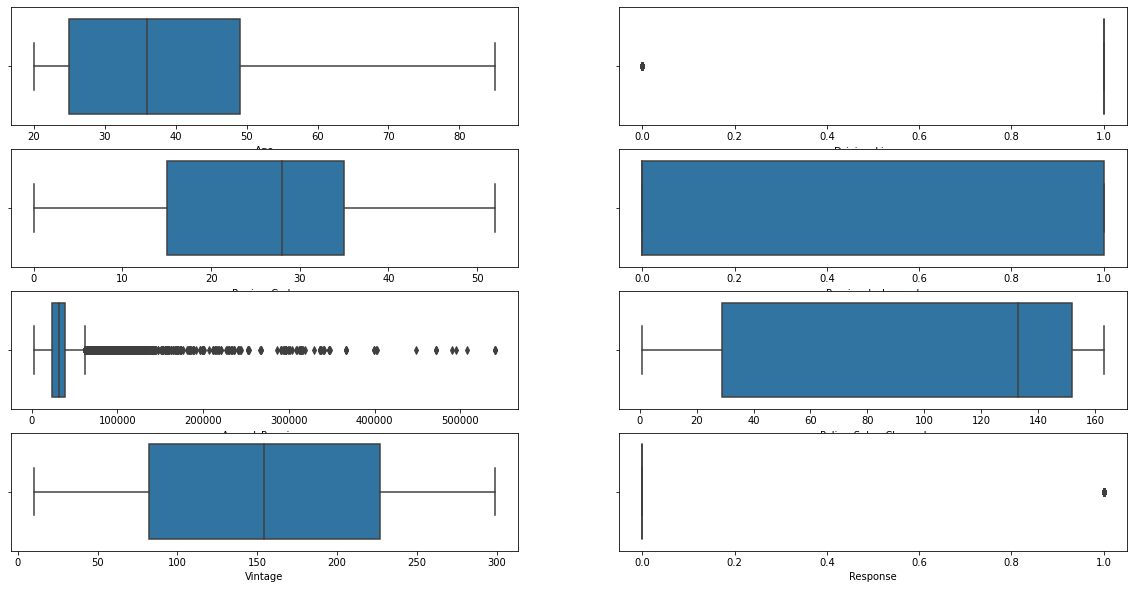

In [130]:
# PLOTTING BOX PLOT TO CHECK OUTLIERS
plt.figure(figsize = (20, 10))
x = 1

for cols in df.describe().columns:
    plt.subplot(4, 2, x)
    sns.boxplot(df[cols])
    x = x + 1

plt.show()

**Observations:**
1. From the box plot, we can say that there are a lot of outliers.
2. These are needed to be treated.

### *Encoding Object Columns*

In [131]:
# ENCODING GENDER
df['Gender'] = df['Gender'].map({'Male' : 1, 'Female' : 0})
df.sample(5)

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
370075,0,46,1,28.0,0,1-2 Year,Yes,40057.0,124.0,75,1
186689,1,45,1,28.0,0,1-2 Year,Yes,39201.0,26.0,169,1
296560,0,39,1,27.0,0,1-2 Year,Yes,28841.0,124.0,292,1
108561,1,22,1,27.0,1,< 1 Year,No,45372.0,152.0,141,0
263779,1,45,1,15.0,0,1-2 Year,Yes,29856.0,124.0,160,1


In [132]:
# ENCODING Vehicle_Damage
df['Vehicle_Damage'] = df['Vehicle_Damage'].map({'Yes' : 1, 'No' : 0})
df.sample(5)

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
124311,1,20,1,5.0,1,< 1 Year,0,2630.0,160.0,16,0
280284,0,23,1,11.0,1,< 1 Year,0,25851.0,152.0,198,0
80993,0,25,1,41.0,1,< 1 Year,0,25504.0,152.0,128,0
109218,1,27,1,22.0,1,< 1 Year,0,21434.0,152.0,191,0
263050,1,51,1,3.0,1,1-2 Year,0,36272.0,124.0,142,0


In [133]:
# ENCODING Vehicle_Age
df['Vehicle_Age'] = df['Vehicle_Age'].map({'< 1 Year' : 0, '1-2 Year' : 1, '> 2 Years' : 2})
df.sample(5)

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
257811,0,23,1,41.0,1,0,0,26096.0,152.0,28,0
368994,1,55,1,28.0,0,1,0,45302.0,61.0,277,0
44276,0,22,1,28.0,0,0,1,45193.0,152.0,189,1
369246,0,79,1,28.0,1,1,0,46600.0,124.0,179,0
64139,0,48,1,8.0,0,1,1,36627.0,124.0,288,0


In [134]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 11 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Gender                381109 non-null  int64  
 1   Age                   381109 non-null  int64  
 2   Driving_License       381109 non-null  int64  
 3   Region_Code           381109 non-null  float64
 4   Previously_Insured    381109 non-null  int64  
 5   Vehicle_Age           381109 non-null  int64  
 6   Vehicle_Damage        381109 non-null  int64  
 7   Annual_Premium        381109 non-null  float64
 8   Policy_Sales_Channel  381109 non-null  float64
 9   Vintage               381109 non-null  int64  
 10  Response              381109 non-null  int64  
dtypes: float64(3), int64(8)
memory usage: 32.0 MB


* Now every column become numerical.

# *Exaploratory Data Analysis and Visualization*

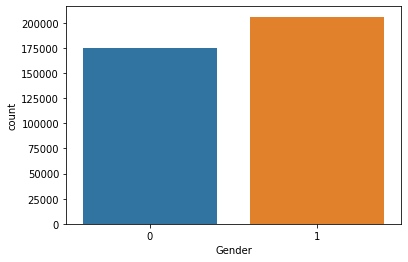

In [135]:
sns.countplot(df['Gender'])

**Observation:**
1. There are more males than female.

In [136]:
pd.crosstab(index = df['Gender'], columns = df['Response'], normalize = 'index')

Response,0,1
Gender,,
0,0.896098,0.103902
1,0.861589,0.138411


**Observation:**
1. Although there are more male than female, from the `Response` perspective, these are equal.

In [137]:
pd.crosstab(index = df['Age'], columns = df['Response'], normalize = 'columns').sort_values(1, ascending = False)

Response,0,1
Age,,
44,0.019575,0.038771
43,0.019833,0.038643
45,0.019163,0.038000
46,0.018457,0.036545
42,0.019007,0.035346
...,...,...
81,0.000156,0.000086
82,0.000084,0.000021
83,0.000063,0.000021


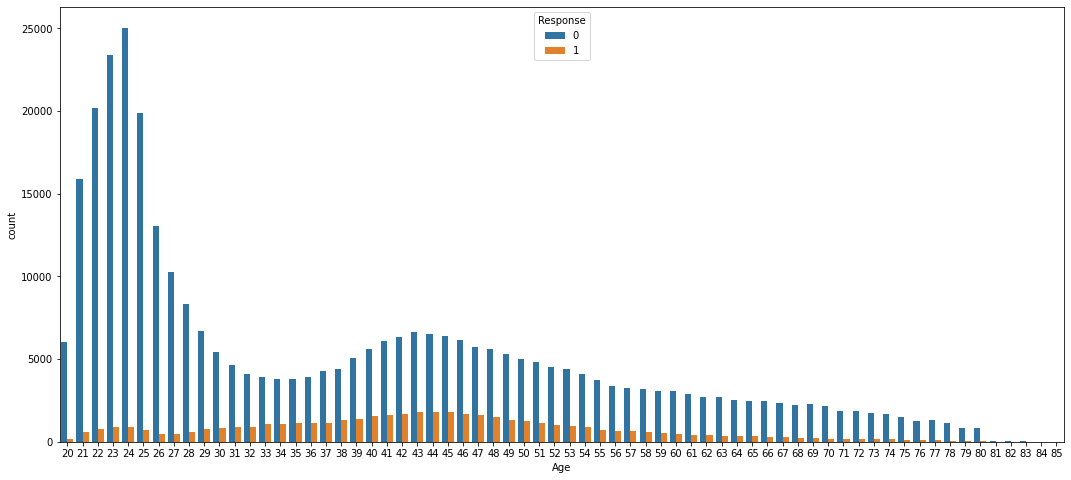

In [138]:
plt.figure(figsize = (18, 8))
sns.countplot(df['Age'], hue = df['Response'])

**Observation:**
1. People having age between 38 yrs to 50 yrs are more likely to respond.
2. People having age between 20 yrs to 30 yrs and more than 54 yrs are less likelt to respond.

([<matplotlib.patches.Wedge at 0x7f9b7ae49710>,
 [Text(-1.0999753580016838, 0.007362865547323239, 'Peple with a Driving License'),
  Text(1.3999686373538716, -0.00937093514779824, 'People Without having a Driving License')],
 [Text(-0.5999865589100092, 0.00401610848035813, '99.79'),
  Text(0.8999798382989173, -0.006024172595013153, '0.21')])

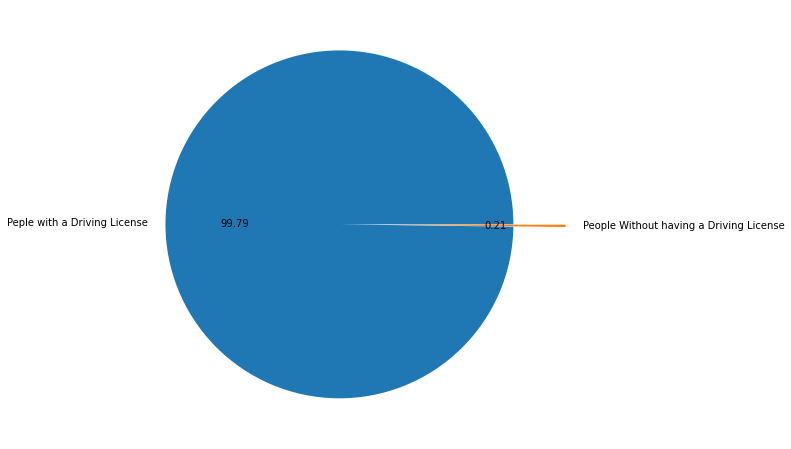

In [139]:
plt.figure(figsize = (8, 8))
plt.pie(
    df['Driving_License'].value_counts(),
    labels = ['Peple with a Driving License', 'People Without having a Driving License'],
    explode = [0, 0.3],
    autopct = '%.2f')

**Observation:**
1. Most of the people have driving license.

In [140]:
pd.crosstab(index = df['Driving_License'], columns = df['Response'], normalize = 'index')

Response,0,1
Driving_License,,
0,0.949507,0.050493
1,0.877283,0.122717


**Observation:**
1. Since More most of the people has a driving license, majoriity of the response that say yes are from people who has driving license


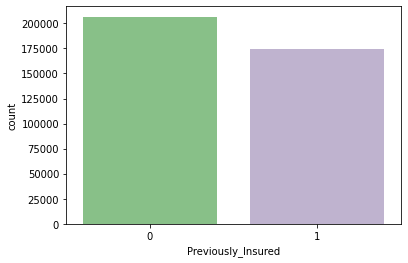

In [141]:
sns.countplot(df['Previously_Insured'], palette = 'Accent')

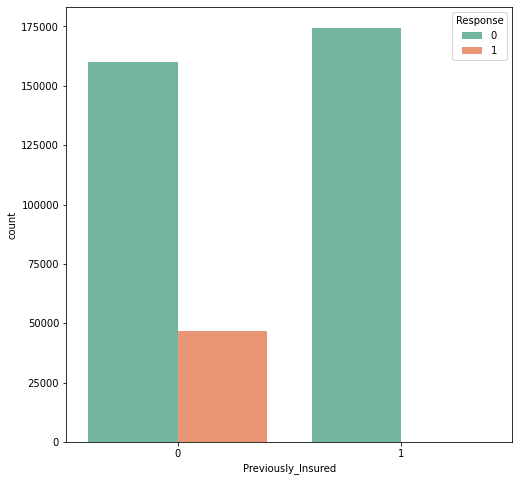

In [142]:
plt.figure(figsize = (8, 8))
sns.countplot(
    df['Previously_Insured'],
    hue = df['Response'],
    palette = 'Set2')

In [143]:
pd.crosstab(index = df['Previously_Insured'], columns = df['Response'], normalize = 'index')

Response,0,1
Previously_Insured,,
0,0.774546,0.225454
1,0.999095,0.000905


**Observation:**
1. There are less people who are previously insured.
2. People who previously Insured are less likely to response compared to people who was not previously insured.
3. The reason behind this is may be the customers are not satisfied with the service.

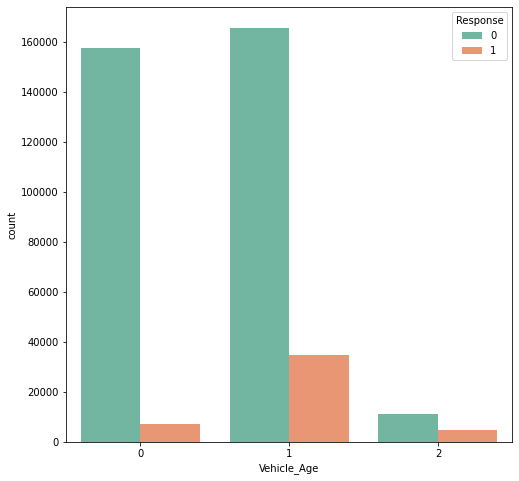

In [144]:
plt.figure(figsize = (8, 8))
sns.countplot(df['Vehicle_Age'],
              hue = df['Response'],
              palette = 'Set2')

In [145]:
pd.crosstab(index = df['Vehicle_Age'], columns = df['Response'], normalize = 'columns')

Response,0,1
Vehicle_Age,,
0,0.471245,0.154185
1,0.494948,0.745151
2,0.033807,0.100664


* 0 --> Vehicle age < 1 year.
* 1 --> Vehicle age 1 - 2 year.
* 2 --> Vehicle age > 2 years.

**Observations:**
1. People that has vehicle for more than 2 years are more likely to respond. 
2. People who has newer vehicle are less likely to respond. 

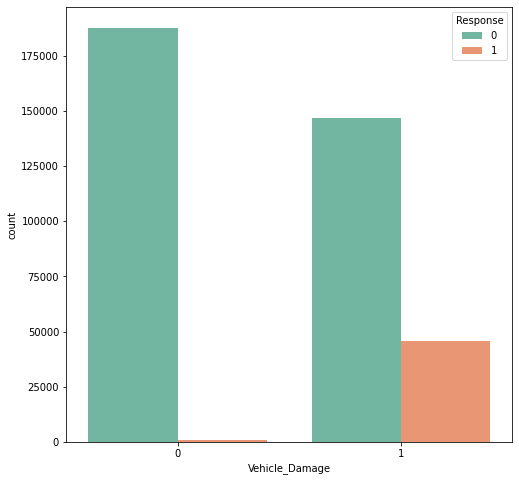

In [146]:
plt.figure(figsize = (8, 8))
sns.countplot(df['Vehicle_Damage'],
              hue = df['Response'],
              palette = 'Set2')

In [147]:
pd.crosstab(index = df['Vehicle_Damage'], columns = df['Response'], normalize = 'index')

Response,0,1
Vehicle_Damage,,
0,0.994796,0.005204
1,0.762345,0.237655


**Observation:**
1. Peeople who has a vehicle damage are more likely to respond since they know the concequences.
2. People who don't have a vehicle Damage Are less likely to respond.

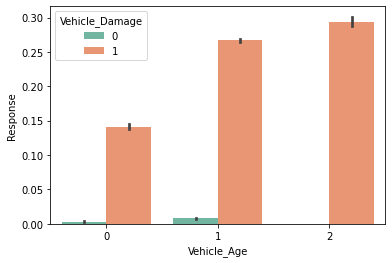

In [148]:
sns.barplot(x = df['Vehicle_Age'],
            y= df['Response'],
            hue = df['Vehicle_Damage'],
            palette = 'Set2')

**Observation:**
1. Customer who has more than 2 years car age has a more likely to have vehicle damage and more likely to response to vehicle insurance
2. Customer who has a vehicle damage are more like to response to Insurance as well

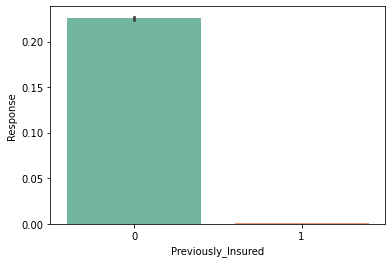

In [149]:
sns.barplot(x = df['Previously_Insured'],
            y = df['Response'],
            palette = 'Set2')

**Observation:**
1. Customer who was not previously insured are more likely to respond  to the vehicle insurance compared to the customer who was previously insured

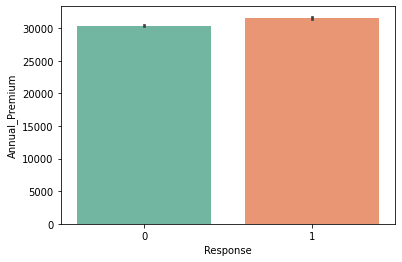

In [150]:
sns.barplot(x = 'Response',
            y ='Annual_Premium',
            data = df,
            palette = 'Set2')

**Observation:**
1. People who response have slightly higher annual premium.

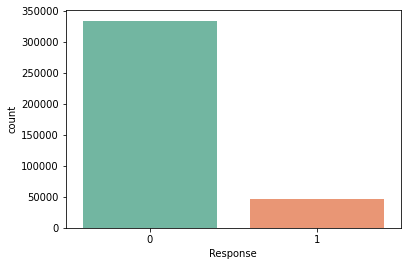

In [151]:
sns.countplot(df['Response'],
              palette = 'Set2')

**Observation:**
1. This Data is imbalance oversampling is neededm or Smote is required.

### Correlation

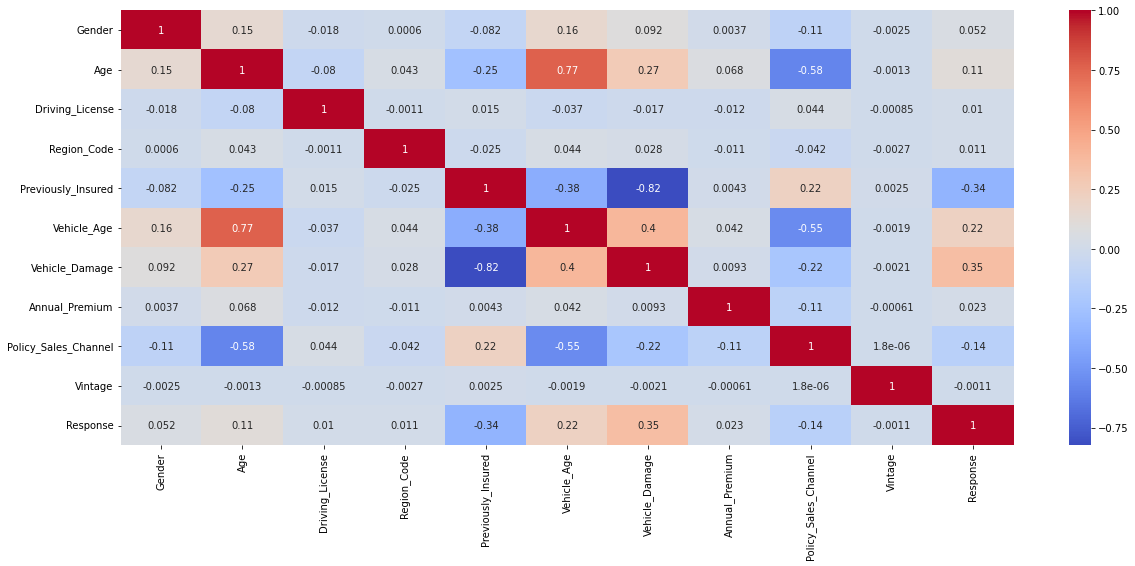

In [152]:
plt.figure(figsize = (20, 8))
sns.heatmap(df.corr(),
            annot = True,
            cmap = 'coolwarm')

**Observation:**
1. High correlation between `Age` and `Vehicle_Age` columns.

In [153]:
df.corr()['Response'].sort_values(ascending = False)

Response                1.000000
Vehicle_Damage          0.354400
Vehicle_Age             0.221874
Age                     0.111147
Gender                  0.052440
Annual_Premium          0.022575
Region_Code             0.010570
Driving_License         0.010155
Vintage                -0.001050
Policy_Sales_Channel   -0.139042
Previously_Insured     -0.341170
Name: Response, dtype: float64

In [154]:
df.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,44,1,28.0,0,2,1,40454.0,26.0,217,1
1,1,76,1,3.0,0,1,0,33536.0,26.0,183,0
2,1,47,1,28.0,0,2,1,38294.0,26.0,27,1
3,1,21,1,11.0,1,0,0,28619.0,152.0,203,0
4,0,29,1,41.0,1,0,0,27496.0,152.0,39,0


# *Model Building*

In [155]:
# DEPENDENT AND INDEPENDENT VAIABLES
X = df.drop(['Response'], axis = 1)
y = df['Response']

In [156]:
# TRAIN TEST SPLIT
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, test_size = 0.2)

In [157]:
# SMOTE PROCESS SINCE DATA IS IMBALANCED
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state = 42)

X_train_sm, y_train_sm = sm.fit_resample(X_train, y_train)

In [158]:
smote_df = pd.concat([X_train_sm, y_train_sm], axis = 1)

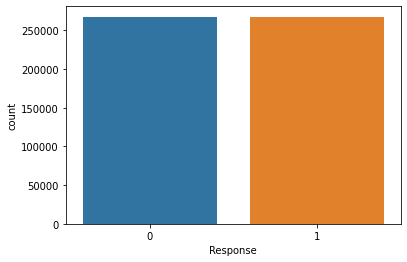

In [159]:
sns.countplot(smote_df['Response'])

* Now the data is balanced.

### Logistic Regression

In [160]:
# CREATING AN OBJECT
logistic = LogisticRegression()

# FITTING OUR MODEL
logistic.fit(X_train_sm, y_train_sm)

# PEDICTING THE TARGET VARIABLE
y_pred_logistic = logistic.predict(X_test)

# MODEL PERFORMANCE,    log --> logistic
accuracy_log = accuracy_score(y_test, y_pred_logistic)
recall_log = recall_score(y_test, y_pred_logistic)
precision_log = precision_score(y_test, y_pred_logistic)
f1_log = f1_score(y_test, y_pred_logistic)

# CLASSIFICATION REPORT
print(classification_report(y_test, y_pred_logistic))
print('\n')

              precision    recall  f1-score   support

           0       0.99      0.60      0.75     66699
           1       0.26      0.97      0.41      9523

    accuracy                           0.65     76222
   macro avg       0.62      0.78      0.58     76222
weighted avg       0.90      0.65      0.71     76222





In [161]:
# CONFUSION MATRIX
smote_df_log = pd.DataFrame(data = confusion_matrix(y_test, y_pred_logistic, labels = [1, 0]),
                            index = ['Actaul_1', 'Actual_0'],
                            columns = ['Predicted_1', 'Predicted_0'])
smote_df_log

,Predicted_1,Predicted_0
Actaul_1,9210,313
Actual_0,26627,40072


**Observation:**
1. 313 peoples are actually interested in insurance but aur model predicted as 'Not interested' (Flase Negative).
2. 26627 peoples are actually not interested in insurance but our model predicted as 'Interested' (False Positive).

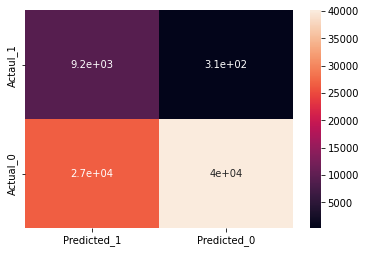

In [162]:
sns.heatmap(smote_df_log, annot = True)

### KNN Classifier

In [163]:
# CREATING OBJECT
knn = KNeighborsClassifier()

# TRAINING OUR DATA
knn.fit(X_train_sm, y_train_sm)

# PREDICTING
y_pred_knn = knn.predict(X_test)

In [164]:
# MODEL PERFORMANCE
accuracy_knn = accuracy_score(y_test, y_pred_knn)
recall_knn = recall_score(y_test, y_pred_knn)
precision_knn = precision_score(y_test, y_pred_knn)
f1_knn = f1_score(y_test, y_pred_knn)

print(classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

           0       0.90      0.69      0.78     66699
           1       0.18      0.46      0.26      9523

    accuracy                           0.66     76222
   macro avg       0.54      0.58      0.52     76222
weighted avg       0.81      0.66      0.72     76222



In [165]:
# CONFUSION MATRIX
smote_df_knn = pd.DataFrame(data = confusion_matrix(y_test, y_pred_knn, labels = [1, 0]),
                            index = ['Actaul_1', 'Actual_0'],
                            columns = ['Predicted_1', 'Predicted_0'])
smote_df_knn

,Predicted_1,Predicted_0
Actaul_1,4395,5128
Actual_0,20481,46218


**Observation:**
1. KNN model has false negative 5128 and False Positive 20481.

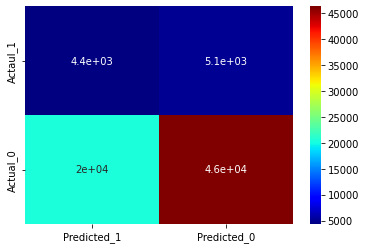

In [166]:
sns.heatmap(smote_df_knn, annot = True, cmap = 'jet')

### Decision Tree

              precision    recall  f1-score   support

           0       0.91      0.87      0.89     66699
           1       0.30      0.37      0.33      9523

    accuracy                           0.81     76222
   macro avg       0.60      0.62      0.61     76222
weighted avg       0.83      0.81      0.82     76222


           Predicted_1  Predicted_0
Actaul_1         3541         5982
Actual_0         8453        58246






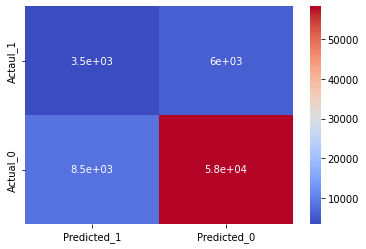

In [167]:
# CREATING AN OBJECT
tree = DecisionTreeClassifier()

# TRAINING OUR DATA
tree.fit(X_train_sm, y_train_sm)

# PREDICTING THE TEST DATA
y_pred_tree = tree.predict(X_test)

# MODEL PERFORMANCE
accuracy_tree = accuracy_score(y_test, y_pred_tree)
recall_tree = recall_score(y_test, y_pred_tree)
precision_tree = precision_score(y_test, y_pred_tree)
f1_tree = f1_score(y_test, y_pred_tree)

print(classification_report(y_test, y_pred_tree))
print('=' * 80)

# CONFUSION MATRIX
smote_df_tree = pd.DataFrame(data = confusion_matrix(y_test, y_pred_tree, labels = [1, 0]),
                            index = ['Actaul_1', 'Actual_0'],
                            columns = ['Predicted_1', 'Predicted_0'])
print('\n', smote_df_tree)
print('=' * 80)
print('\n')

# PLOTTING THE CONFUSION matrix
print('\n')
sns.heatmap(smote_df_tree, annot = True, cmap = 'coolwarm')

**Observation:**
1. False Negative: 4005
2. False Positive: 8490

### Random Forest

              precision    recall  f1-score   support

           0       0.91      0.87      0.89     66699
           1       0.30      0.37      0.33      9523

    accuracy                           0.81     76222
   macro avg       0.60      0.62      0.61     76222
weighted avg       0.83      0.81      0.82     76222


           Predicted_1  Predicted_0
Actaul_1         3541         5982
Actual_0         8453        58246






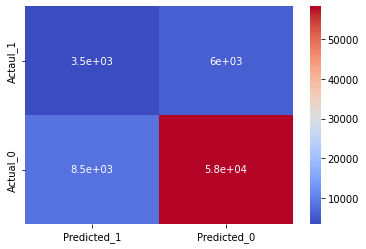

In [168]:
# CREATING AN OBJECT
randomForest = RandomForestClassifier()

# TRAINING OUR DATA
randomForest.fit(X_train_sm, y_train_sm)

# PREDICTING THE TEST DATA
y_pred_forest = tree.predict(X_test)

# MODEL PERFORMANCE
accuracy_forest = accuracy_score(y_test, y_pred_forest)
recall_forest = recall_score(y_test, y_pred_forest)
precision_forest = precision_score(y_test, y_pred_forest)
f1_forest = f1_score(y_test, y_pred_forest)

print(classification_report(y_test, y_pred_forest))
print('=' * 80)

# CONFUSION MATRIX
smote_df_forest = pd.DataFrame(data = confusion_matrix(y_test, y_pred_forest, labels = [1, 0]),
                              index = ['Actaul_1', 'Actual_0'],
                              columns = ['Predicted_1', 'Predicted_0'])
print('\n', smote_df_forest)
print('\n')
print('=' * 80)

# PLOTTING THE CONFUSION matrix
print('\n')
sns.heatmap(smote_df_forest, annot = True, cmap = 'coolwarm')

**Observation:**
1. False Positive: 8490
2. False Negative: 6018

In [169]:
# MODEL PERFORMANCE DF
pd.DataFrame({
    'Logistic Regression' : [accuracy_log, precision_log, recall_log, f1_log],
    'KNN' : [accuracy_knn, precision_knn, recall_knn, f1_knn],
    'Decision Tree' : [accuracy_tree, precision_tree, recall_tree, f1_tree],
    'Random Forest' : [accuracy_forest, precision_forest, recall_forest, f1_forest]
}, index = ['Accuracy', 'Precision', 'Recall', 'F1 - Score'])

,Logistic Regression,KNN,Decision Tree,Random Forest
Accuracy,0.646559,0.664021,0.810619,0.810619
Precision,0.256997,0.176676,0.295231,0.295231
Recall,0.967132,0.461514,0.371837,0.371837
F1 - Score,0.406085,0.255531,0.329135,0.329135


**Observation:**
1. Logistic Regression has best Recall score.

# *Model Building with HyperParameter tuning*

### Logistic Regression Tuning

Fitting 3 folds for each of 15 candidates, totalling 45 fits
Best Estimator:   LogisticRegression(C=0.5)




              precision    recall  f1-score   support

           0       0.99      0.60      0.75     66699
           1       0.26      0.97      0.41      9523

    accuracy                           0.65     76222
   macro avg       0.62      0.78      0.58     76222
weighted avg       0.90      0.65      0.71     76222




           Predicted_1  Predicted_0
Actaul_1         9210          313
Actual_0        26626        40073






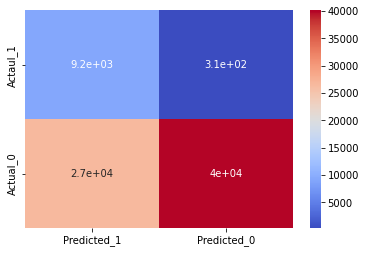

In [170]:
# SETTING PARAMETERS
logistic_param = {
    'C' : [1, 0.5, 0.1, 5, 9],
    'penalty' : ['l2', 'l1', 'elasticnet']
}

# BUILDING MODEL
logistic_tuned = GridSearchCV(estimator = logistic,
                              param_grid = logistic_param, cv = 3,
                              n_jobs = -1, verbose = 1, scoring = 'recall')

# TRAINING OUR DATA
logistic_tuned.fit(X_train_sm, y_train_sm)

# GETTING BEST ESTIMATOR
logistic_tuned_best = logistic_tuned.best_estimator_
print('Best Estimator:  ', logistic_tuned_best)
print('\n')
print('=' * 80)

# PEDICTING THE TEST DATA USING BEST ESTIMATOR
y_pred_logistic_tuned = logistic_tuned_best.predict(X_test)

# PERFORMANCE SCORE
accuracy_logistic_tuned = accuracy_score(y_test, y_pred_logistic_tuned)
precision_logistic_tuned = precision_score(y_test, y_pred_logistic_tuned)
recall_logistic_tuned = recall_score(y_test, y_pred_logistic_tuned)
f1_logistic_tuned = f1_score(y_test,y_pred_logistic_tuned)

# CLASSIFICATION REPORT
print('\n')
print(classification_report(y_test, y_pred_logistic_tuned))
print('\n')
print('=' * 80)

# CONFUSION MATRIX
smote_df_logistic_tuned = pd.DataFrame(data = confusion_matrix(y_test, y_pred_logistic_tuned, labels = [1, 0]),
                                      index = ['Actaul_1', 'Actual_0'],
                                      columns = ['Predicted_1', 'Predicted_0'])
print('\n', smote_df_logistic_tuned)
print('\n')
print('=' * 80)

# PLOTTING
print('\n')
sns.heatmap(smote_df_logistic_tuned, annot = True, cmap = 'coolwarm')

**Observation:**
1. False Positive: 26626
2. False Negative: 313
3. Logistic Regression doesn't change after tuning.

### KNN Tuning

Fitting 3 folds for each of 12 candidates, totalling 36 fits
Best Estimator:   KNeighborsClassifier(n_neighbors=6, p=1, weights='distance')




              precision    recall  f1-score   support

           0       0.90      0.73      0.81     66699
           1       0.19      0.44      0.27      9523

    accuracy                           0.70     76222
   macro avg       0.55      0.59      0.54     76222
weighted avg       0.81      0.70      0.74     76222




           Predicted_1  Predicted_0
Actaul_1         4226         5297
Actual_0        17782        48917






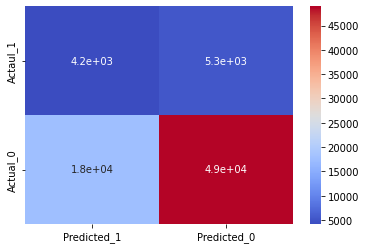

In [171]:
# SETTING PARAMETERS
knn_param = {
    'n_neighbors' : [5, 6, 7],
    'weights' : ['uniform', 'distance'],
    'p' : [2, 1]
}

# BUILDING MODEL
knn_tuned = GridSearchCV(estimator = knn,
                        param_grid = knn_param, cv = 3,
                        n_jobs = -1, verbose = 1, scoring = 'recall')

# TRAINING OUR DATA
knn_tuned.fit(X_train_sm, y_train_sm)

# GETTING BEST ESTIMATOR
knn_tuned_best = knn_tuned.best_estimator_
print('Best Estimator:  ', knn_tuned_best)
print('\n')
print('=' * 80)

# PEDICTING THE TEST DATA USING BEST ESTIMATOR
y_pred_knn_tuned = knn_tuned_best.predict(X_test)

# PERFORMANCE SCORE
accuracy_knn_tuned = accuracy_score(y_test, y_pred_knn_tuned)
precision_knn_tuned = precision_score(y_test, y_pred_knn_tuned)
recall_knn_tuned = recall_score(y_test, y_pred_knn_tuned)
f1_knn_tuned = f1_score(y_test,y_pred_knn_tuned)

# CLASSIFICATION REPORT
print('\n')
print(classification_report(y_test, y_pred_knn_tuned))
print('\n')
print('=' * 80)

# CONFUSION MATRIX
smote_df_knn_tuned = pd.DataFrame(data = confusion_matrix(y_test, y_pred_knn_tuned, labels = [1, 0]),
                                  index = ['Actaul_1', 'Actual_0'],
                                  columns = ['Predicted_1', 'Predicted_0'])
print('\n', smote_df_knn_tuned)
print('\n')
print('=' * 80)

# PLOTTING
print('\n')
sns.heatmap(smote_df_knn_tuned, annot = True, cmap = 'coolwarm')

**Observation:**
1. False Positive: 17782.
2. False Negative: 5297.
3. False Negative decreased.
5. Recall Score increased.

### Decision Tree Tuning

Fitting 3 folds for each of 480 candidates, totalling 1440 fits
Best Estimator:   DecisionTreeClassifier(max_depth=50, max_features=0.2, min_samples_leaf=0.1,
                       min_samples_split=9)




              precision    recall  f1-score   support

           0       0.96      0.43      0.59     66699
           1       0.18      0.88      0.30      9523

    accuracy                           0.48     76222
   macro avg       0.57      0.65      0.45     76222
weighted avg       0.86      0.48      0.56     76222




           Predicted_1  Predicted_0
Actaul_1         8388         1135
Actual_0        38127        28572






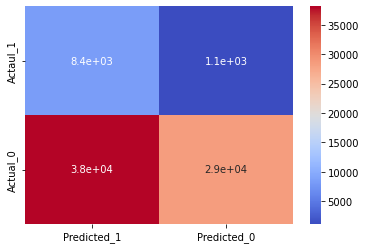

In [172]:
# SETTING PARAMETERS
tree_param = {
    'max_depth' : [None, 4, 9, 15, 20, 50],
    'min_samples_leaf' : [1, 4, 0.1, 2, 10],
    'max_features' : [None, 0.2, 0.8, 2.0],
    "min_samples_split": [2, 9, 15, 25]
}

# BUILDING MODEL
tree_tuned = GridSearchCV(estimator = tree,
                          param_grid = tree_param, cv = 3,
                          n_jobs = -1, verbose = 1, scoring = 'recall')

# TRAINING OUR DATA
tree_tuned.fit(X_train_sm, y_train_sm)

# GETTING BEST ESTIMATOR
tree_tuned_best = tree_tuned.best_estimator_
print('Best Estimator:  ', tree_tuned_best)
print('\n')
print('=' * 80)

# PEDICTING THE TEST DATA USING BEST ESTIMATOR
y_pred_tree_tuned = tree_tuned_best.predict(X_test)

# PERFORMANCE SCORE
accuracy_tree_tuned = accuracy_score(y_test, y_pred_tree_tuned)
precision_tree_tuned = precision_score(y_test, y_pred_tree_tuned)
recall_tree_tuned = recall_score(y_test, y_pred_tree_tuned)
f1_tree_tuned = f1_score(y_test,y_pred_tree_tuned)

# CLASSIFICATION REPORT
print('\n')
print(classification_report(y_test, y_pred_tree_tuned))
print('\n')
print('=' * 80)

# CONFUSION MATRIX
smote_df_tree_tuned = pd.DataFrame(data = confusion_matrix(y_test, y_pred_tree_tuned, labels = [1, 0]),
                                  index = ['Actaul_1', 'Actual_0'],
                                  columns = ['Predicted_1', 'Predicted_0'])
print('\n', smote_df_tree_tuned)
print('\n')
print('=' * 80)

# PLOTTING
print('\n')
sns.heatmap(smote_df_tree_tuned, annot = True, cmap = 'coolwarm')

**Observation:**
1. False Positive: 25295
2. False Negative: 3505

### Random Forest Tuning

In [173]:
# CREATING An OBJECT
randomForest = RandomForestClassifier(n_jobs = -1)

# SETTING PARAMETERS
forest_param = {
    "n_estimators" : [100, 500, 1000],
    "max_depth" : [None, 4, 6, 8],
    "min_samples_leaf" : [1, 0.06, 3, 5],
    "min_samples_split" : [2, 9, 15, 25],
    "max_features" : ['auto', 'sqrt', 'log2'],
    "criterion": ['gini', 'entropy']
}

In [ ]:
# BUILDING MODEL
foest_tuned = GridSearchCV(estimator = randomForest,
                           param_grid = forest_param, cv = 3,
                           verbose = 1, scoring = 'recall')

# TRAINING OUR DATA
foest_tuned.fit(X_train_sm, y_train_sm)

Fitting 3 folds for each of 1152 candidates, totalling 3456 fits


In [ ]:
# GETTING BEST ESTIMATOR
foest_tuned_best = foest_tuned.best_estimator_
print('Best Estimator:  ', foest_tuned_best)

# PEDICTING THE TEST DATA USING BEST ESTIMATOR
y_pred_forest_tuned = foest_tuned_best.predict(X_test)

# PERFORMANCE SCORE
accuracy_forest_tuned = accuracy_score(y_test, y_pred_forest_tuned)
precision_forest_tuned = precision_score(y_test, y_pred_forest_tuned)
recall_forest_tuned = recall_score(y_test, y_pred_forest_tuned)
f1_forest_tuned = f1_score(y_test,y_pred_forest_tuned)

In [ ]:
pd.DataFrame({
    'Logistic Regression' : [accuracy_logistic_tuned, precision_logistic_tuned, recall_logistic_tuned, f1_logistic_tuned]
    'KNN' : [accuracy_knn_tuned, precision_knn_tuned, recall_knn_tuned, f1_knn_tuned]
    'Decision Tree' : [accuracy_tree_tuned, precision_tree_tuned, recall_tree_tuned, f1_tree_tuned]
    'Random Forest' : [accuracy_forest_tuned, precision_forest_tuned, recall_forest_tuned, f1_forest_tuned]
}, index = ['Accuracy', 'Precision', 'Recall', 'F1 - Score'])

In [ ]:
# CONFUSION MATRIX
smote_df_forest_tuned = pd.DataFrame(data = confusion_matrix(y_test, y_pred_forest_tuned, labels = [1, 0]),
                                  index = ['Actaul_1', 'Actual_0'],
                                  columns = ['Predicted_1', 'Predicted_0'])
print('\n', smote_df_forest_tuned)
print('\n')
print('=' * 80)

# PLOTTING
print('\n')
sns.heatmap(smote_df_forest_tuned, annot = True, cmap = 'coolwarm')

In [ ]:
# CLASSIFICATION REPORT
print('\n')
print(classification_report(y_test, y_pred_forest_tuned))
print('\n')
print('=' * 80)

# *Conclusion*